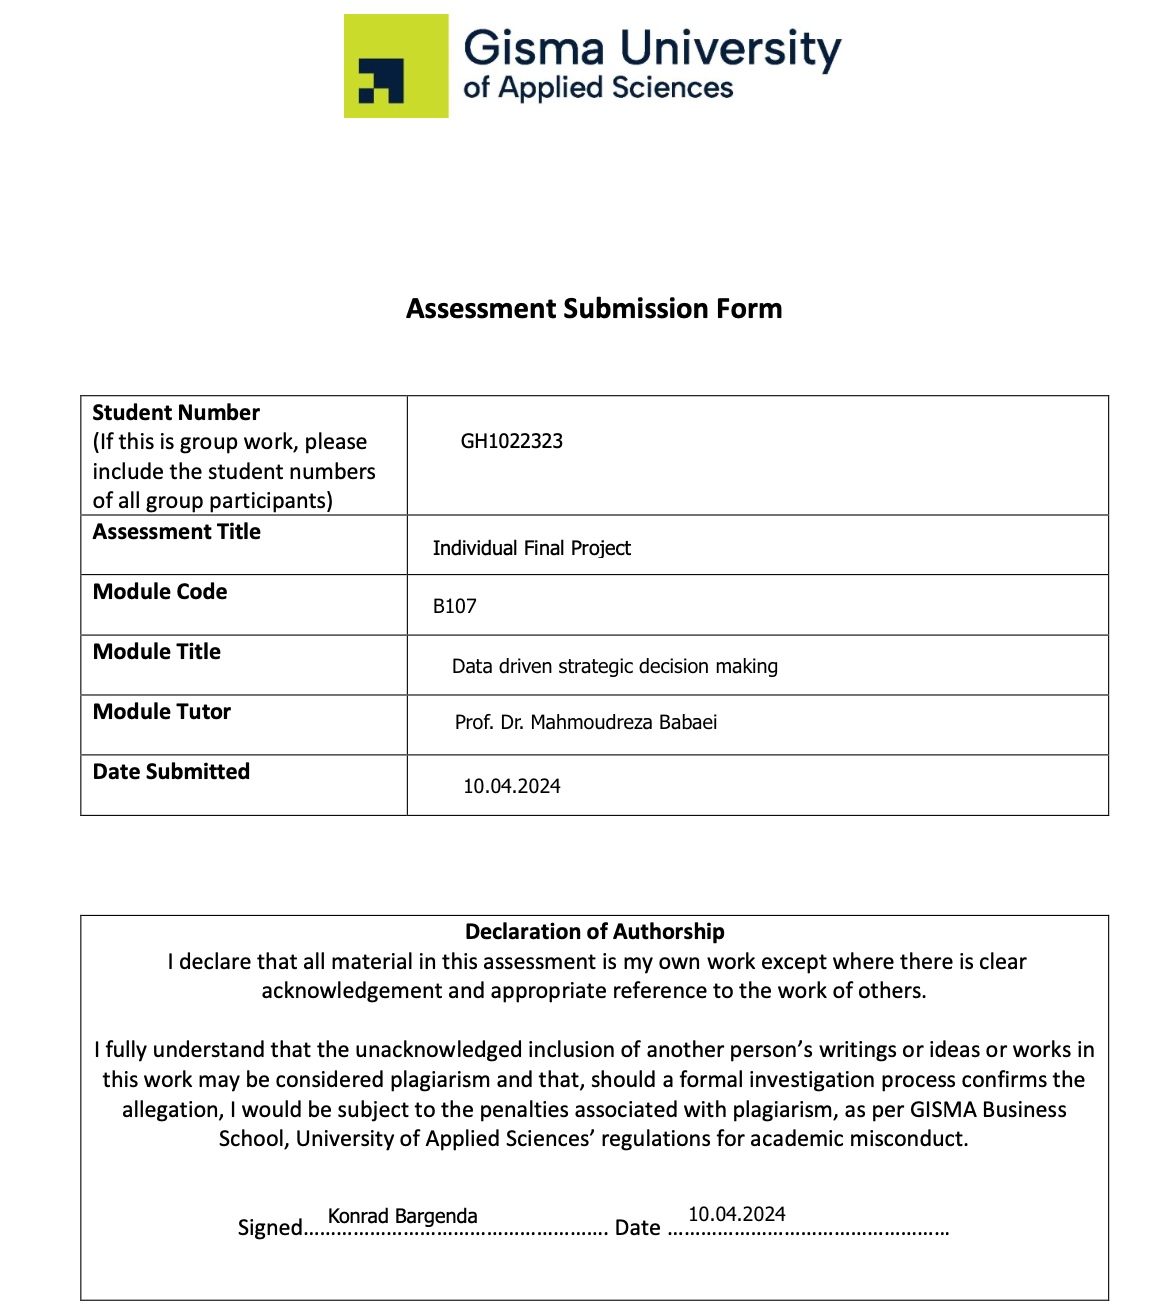

Last FM in Asia Network


Last FM is a music website which uses specific algorithms that are able to build a music profile for every user and recomendent music. Last FM also is used as an internet radio. At the moment the company is redesigning the website and creating new features like radio for a popular application called Discord.


Social network that im using shows users from Asia and their mutual follower relationships between them. The dataset contains undirected network.


For this report I used a website called SNAP Stanford which contains many different networks.


Research Question: How similar music taste affect relationships between users.



Also for some analysis i had to change number of nodes because of the time it took to generate the graph.

# Real Graph

First of all I will create a Real network and then create 3 synthetic ones: Barabasi graph, Watt Strogatz graph and Erdos-Renyi graph. To make graphs more accurate I will use the same amount of nodes as in Real Network.


For creating those graphs I decided to use only 100 nodes because when I tried to put more, my computer was loading graphs for a very long time so I decided that showing 100 nodes will be accurate and much more efficient.





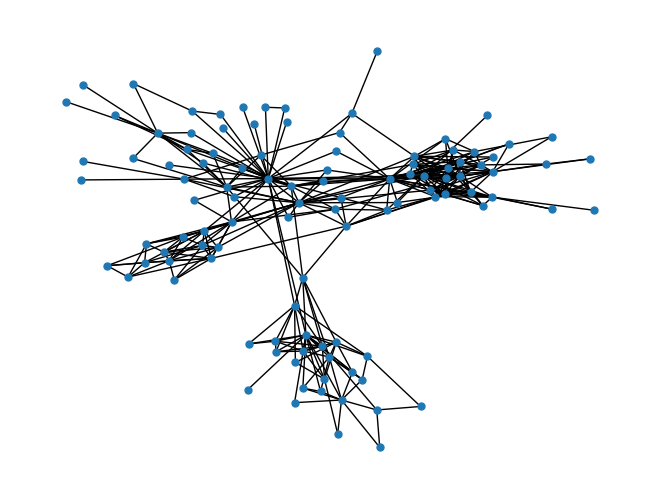

In [3]:
# Importing Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

connected_components = list(nx.connected_components(G))

largest_component = max(connected_components, key=len)

start_node = random.choice(list(largest_component))

subgraph_nodes = {start_node}

while len(subgraph_nodes) < 100:
    current_node = random.choice(list(subgraph_nodes))
    neighbors = list(G.neighbors(current_node))
    subgraph_nodes.update(neighbors)

G_sub = G.subgraph(subgraph_nodes)

nx.draw(G_sub, with_labels=False, font_weight='', node_size=25)
plt.show()


So this graph shows connections between nodes in the data set which is real graph. But for futher analysis i will create also 3 synthetic. Synthetic data is very usefull when there is incomplete real data and while creating synthetic graph they are more controlabe so we dont have to follow certian patterns.

# Erdos-Renyi Model

```
# Sformatowano jako kod
```



Erdos-Renyi model is used to generate random graphs.[tekst linku](https://)

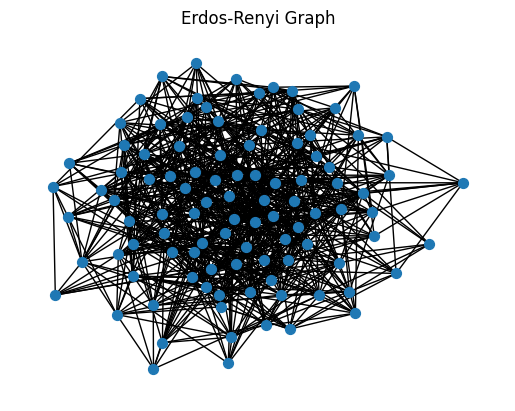

In [ ]:
erdos_renyi_graph = nx.erdos_renyi_graph(n=100, p=0.15)

plt.title("Erdos-Renyi Graph")
nx.draw(erdos_renyi_graph, with_labels=False, node_size=50)
plt.show()


# Watts-Strogatz model

Watts-Strogatz is also random graph that has small-world properties, short path lengths and high clustering.

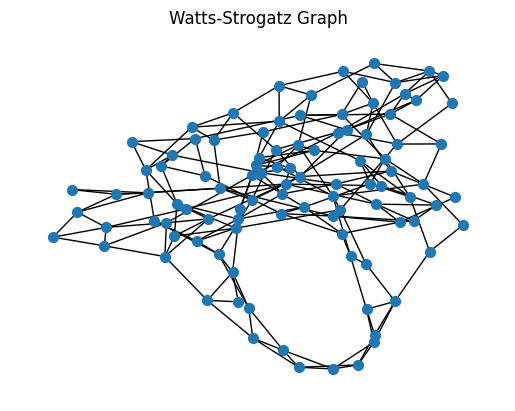

In [ ]:

watts_strogatz_graph = nx.watts_strogatz_graph(n=100, k=4, p=0.2)

plt.title("Watts-Strogatz Graph")
nx.draw(watts_strogatz_graph, with_labels=False, node_size=50)
plt.show()


# Barabasi-Albert Graph

Barabasi- Albert model is an algorithm that is generaating random scale-free network.

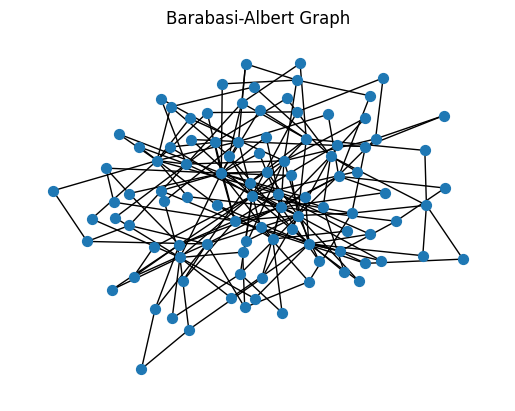

In [ ]:

barabasi_albert_graph = nx.barabasi_albert_graph(n=100, m=2)

plt.title("Barabasi-Albert Graph")
nx.draw(barabasi_albert_graph, with_labels=False, node_size=50)
plt.show()


# Network analysis

Network is a representation of objects/people and relationshops between them. By implementing network analyis we can understand the structure and what kind of relationships is between objects/people(nodes).

1. Number of edges: 27806
2. Number of nodes 7624
3. Density 0.0009568849118596328
4. Max degree: 216
5. Minimum degree: 1
6. Avrage degree: 7.2943336831059815
7. Number of triangles: 40433


#Network analysis Real Graph

Degree distribution is a propability of the node having with another node ove the whole network.

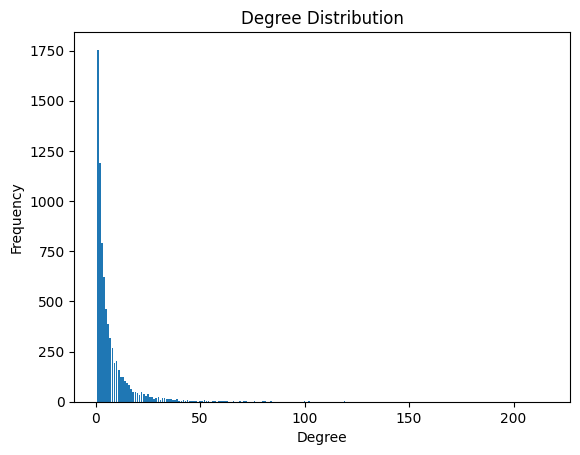

In [ ]:

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

degrees = dict(G.degree())

degree_distribution = {}
for degree in degrees.values():
    degree_distribution[degree] = degree_distribution.get(degree, 0) + 1
plt.bar(degree_distribution.keys(), degree_distribution.values())
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()



Connected components is a subgraph of the set of vertices that are linked by paths.

Number of connected components: 1


<ipython-input-3-ac03e63d8e95>:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(component, subset_size)


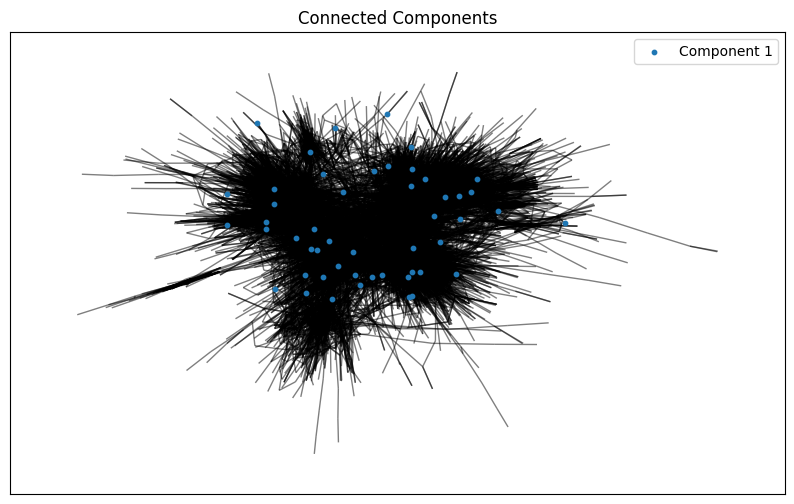

In [3]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

connected_components = list(nx.connected_components(G))

print("Number of connected components:", len(connected_components))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
for i, component in enumerate(connected_components):
    subset_size = min(len(component), 100)
    sampled_nodes = random.sample(component, subset_size)
    nx.draw_networkx_nodes(G, pos, nodelist=sampled_nodes, node_color=f'C{i}', label=f'Component {i+1}', node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Connected Components')
plt.legend()
plt.show()


Shortest path is the way to find shortest path between two nodes in the graph.

In [4]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

source_node = 1
target_node = 10

shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

print("Shortest path between node {} and node {}: ".format(source_node, target_node))
print(shortest_path)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=[source_node, target_node], node_color='red', node_size=300)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)], edge_color='red', width=2)
plt.title('Shortest Path')
plt.show()


Shortest path between node 1 and node 10: 
[1, 4257, 1698, 7199, 1178, 5489, 10]


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

Average clustering coefficent is used measure how a vertex's is connected with another vertex's neighbors.

Average Clustering Coefficient: 0.2194184243270858


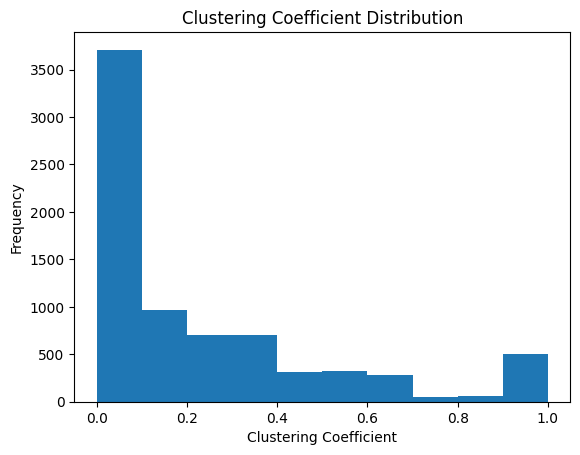

In [ ]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

clustering_coefficients = nx.clustering(G)

average_clustering = nx.average_clustering(G)

print("Average Clustering Coefficient:", average_clustering)

plt.hist(list(clustering_coefficients.values()), bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()


Centrality gives an idea on which node or edge  is most important for the connectivity or the information flow of the network.

Degree centrality is a measure how many edges each node has.

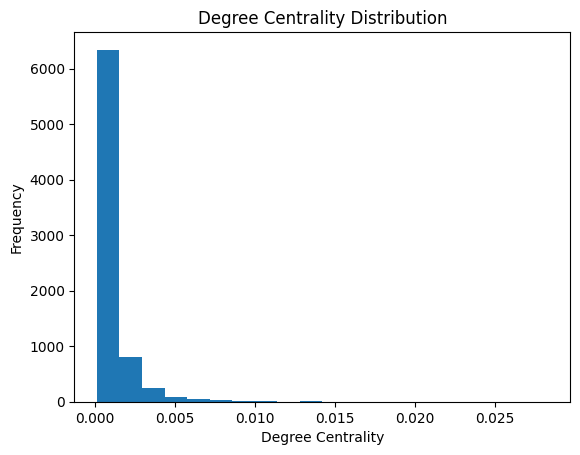

In [ ]:

edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

degree_centrality = nx.degree_centrality(G)

plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


Betweenness centrality measures which nodes are most important in the network and to calcualte it. Its  useing the shortest shortest paths.

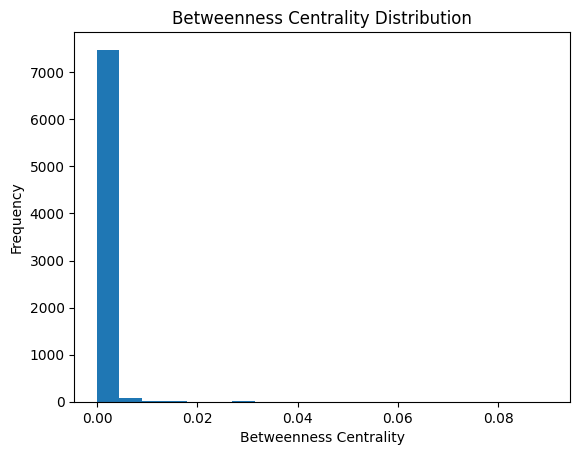

In [ ]:

edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

betweenness_centrality = nx.betweenness_centrality(G)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


Closeness centrality in this centrality we are also using shortest paths between nodes like in betweeness in order to measure distance between them.



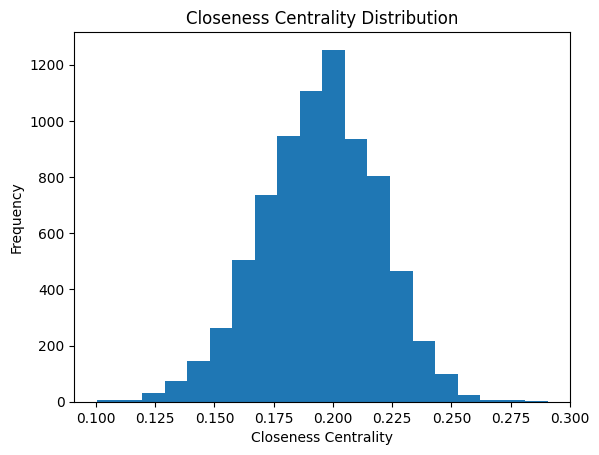

In [ ]:

edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

closeness_centrality = nx.closeness_centrality(G)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()


Eigenvector Centrality is used to measure the transitive influence of nodes.

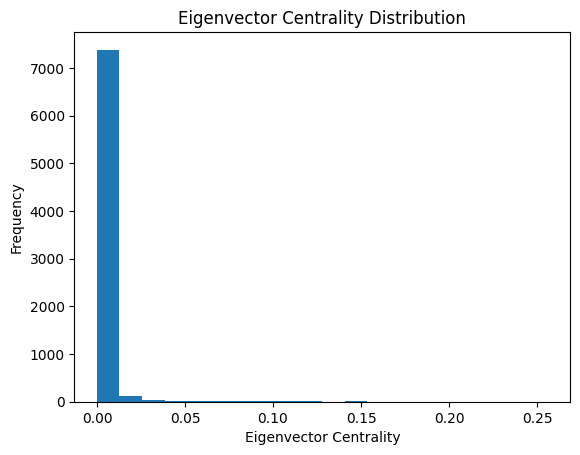

In [ ]:

edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

eigenvector_centrality = nx.eigenvector_centrality(G)

plt.hist(list(eigenvector_centrality.values()), bins=20)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()


# Network analysis Erdos-renyi graph

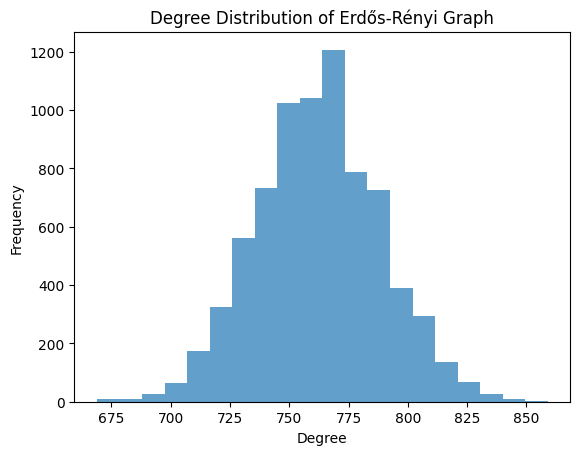

In [6]:
n = 7624
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)
degree_sequence = sorted([d for n, d in erdos_renyi_graph.degree()], reverse=True)
plt.hist(degree_sequence, bins=20, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Erdős-Rényi Graph')
plt.show()


Number of connected components: 3


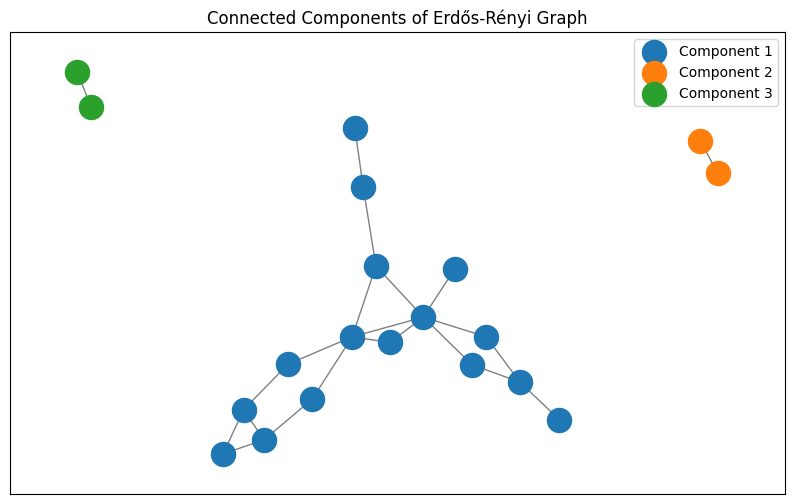

In [20]:

n = 20
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

connected_components = list(nx.connected_components(erdos_renyi_graph))

max_components = 5
connected_components = connected_components[:max_components]

print("Number of connected components:", len(connected_components))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(erdos_renyi_graph)
for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(erdos_renyi_graph, pos, nodelist=list(component), node_color=f'C{i}', label=f'Component {i+1}')
nx.draw_networkx_edges(erdos_renyi_graph, pos, alpha=0.5)
plt.title('Connected Components of Erdős-Rényi Graph')
plt.legend()
plt.show()


In [21]:
n = 100
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

avg_shortest_path_length = nx.average_shortest_path_length(erdos_renyi_graph)

print("Average Shortest Path Length:", avg_shortest_path_length)


Average Shortest Path Length: 2.2896969696969696


Average Clustering Coefficient: 0.09960908076953905


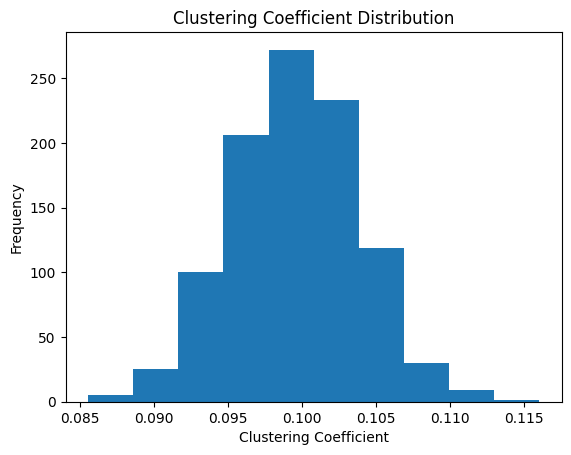

In [14]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

n = 1000
p = 0.1
erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

clustering_coefficients = nx.clustering(erdos_renyi_graph)

average_clustering = nx.average_clustering(erdos_renyi_graph)

print("Average Clustering Coefficient:", average_clustering)

plt.hist(list(clustering_coefficients.values()), bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()


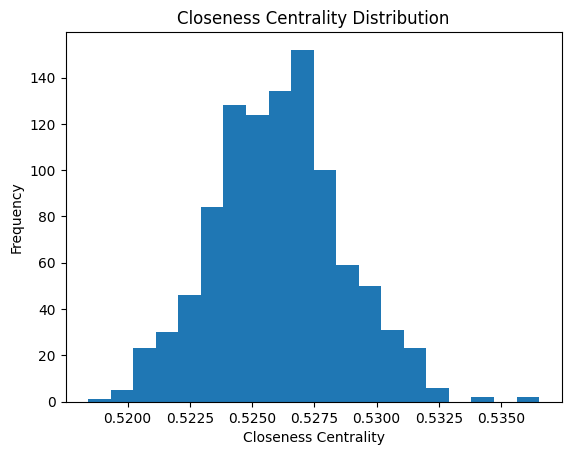

In [14]:
n = 1000
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

closeness_centrality = nx.closeness_centrality(erdos_renyi_graph)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()


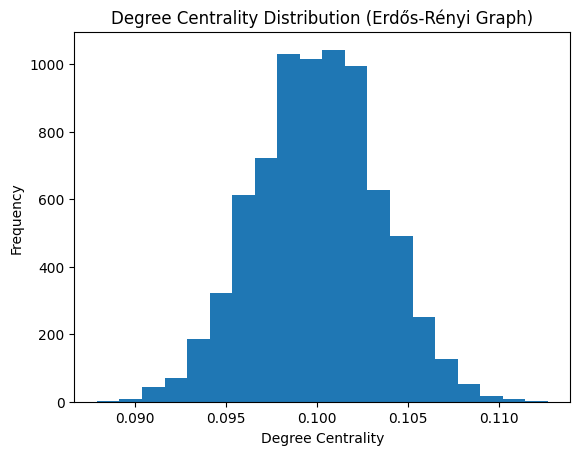

In [24]:
n = 7624
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

degree_centrality = nx.degree_centrality(erdos_renyi_graph)

plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality Distribution (Erdős-Rényi Graph)')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


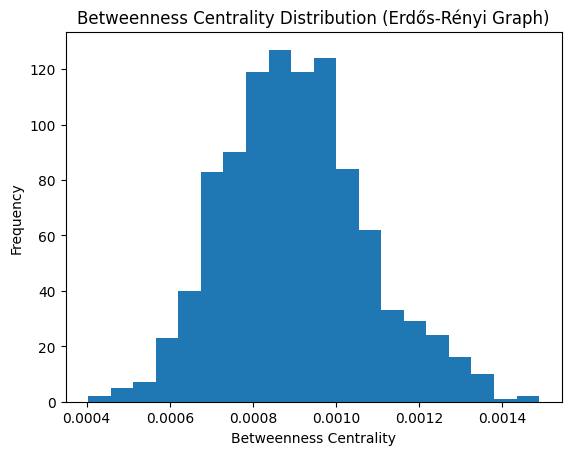

In [31]:

n = 1000
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

betweenness_centrality = nx.betweenness_centrality(erdos_renyi_graph)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality Distribution (Erdős-Rényi Graph)')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


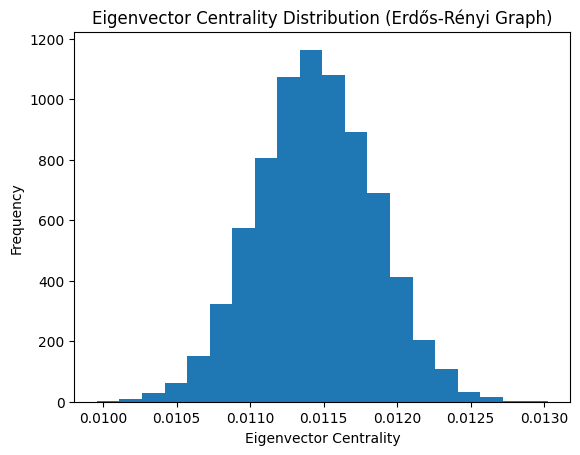

In [27]:
n = 7624
p = 0.1

erdos_renyi_graph = nx.erdos_renyi_graph(n, p)

eigenvector_centrality = nx.eigenvector_centrality(erdos_renyi_graph)

plt.hist(list(eigenvector_centrality.values()), bins=20)
plt.title('Eigenvector Centrality Distribution (Erdős-Rényi Graph)')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()


# Network analysis Watts-Strogatz Graph

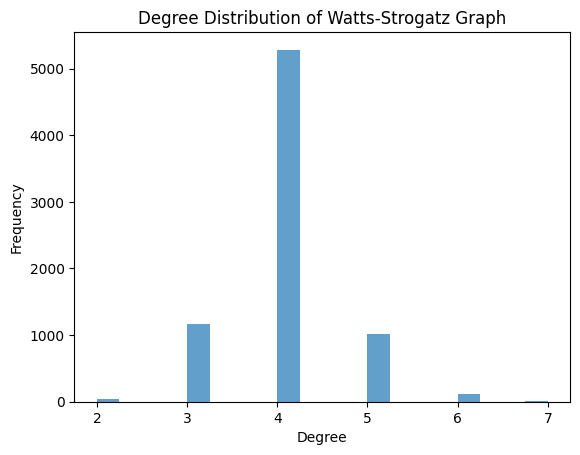

In [28]:

n = 7624
k = 4
p = 0.1

watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

degree_sequence = sorted([d for n, d in watts_strogatz_graph.degree()], reverse=True)

plt.hist(degree_sequence, bins=20, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Watts-Strogatz Graph')
plt.show()


Number of connected components: 1


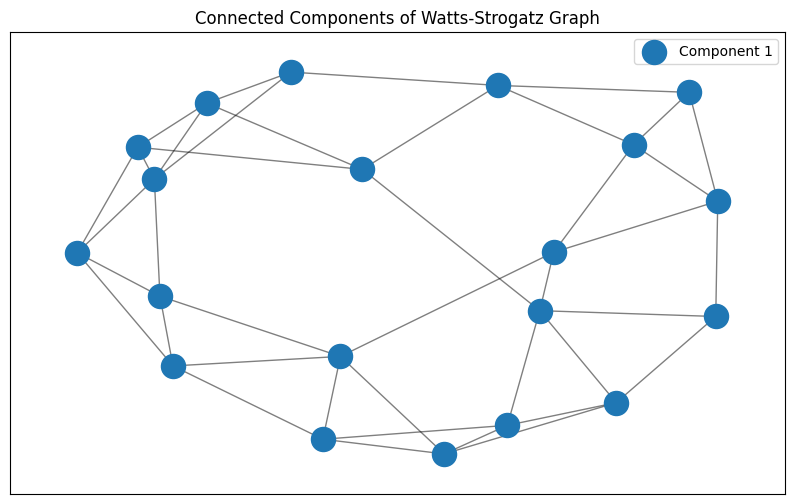

In [29]:
n = 20
k = 4
p = 0.1
watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

connected_components = list(nx.connected_components(watts_strogatz_graph))

max_components = 5
connected_components = connected_components[:max_components]

print("Number of connected components:", len(connected_components))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(watts_strogatz_graph)
for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(watts_strogatz_graph, pos, nodelist=list(component), node_color=f'C{i}', label=f'Component {i+1}')
nx.draw_networkx_edges(watts_strogatz_graph, pos, alpha=0.5)
plt.title('Connected Components of Watts-Strogatz Graph')
plt.legend()
plt.show()


In [32]:
n = 100
k = 4
p = 0.1

watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

avg_shortest_path_length = nx.average_shortest_path_length(watts_strogatz_graph)

print("Average Shortest Path Length:", avg_shortest_path_length)


Average Shortest Path Length: 4.665050505050505


In [34]:
n = 7624
k = 4
p = 0.1

watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

clustering_coefficient = nx.average_clustering(watts_strogatz_graph)
print("Average Clustering Coefficient:", clustering_coefficient)

density = nx.density(watts_strogatz_graph)
print("Density of the graph:", density)


Average Clustering Coefficient: 0.3746652176085561
Density of the graph: 0.0005247277974550702


Average Clustering Coefficient: 0.39307142857142824


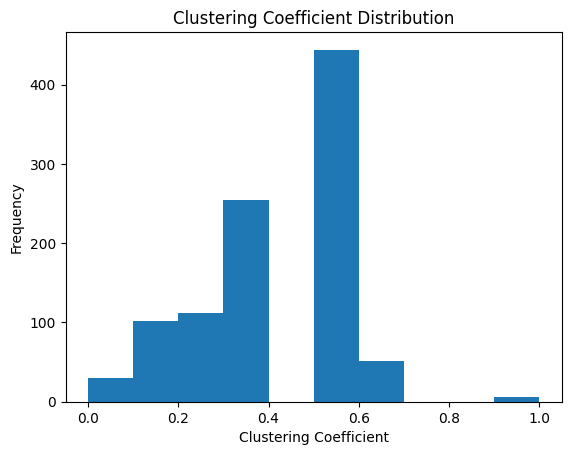

In [16]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

n = 1000
k = 4
p = 0.1
watts_graph = nx.watts_strogatz_graph(n, k, p)

clustering_coefficients = nx.clustering(watts_graph)

average_clustering = nx.average_clustering(watts_graph)

print("Average Clustering Coefficient:", average_clustering)

plt.hist(list(clustering_coefficients.values()), bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()


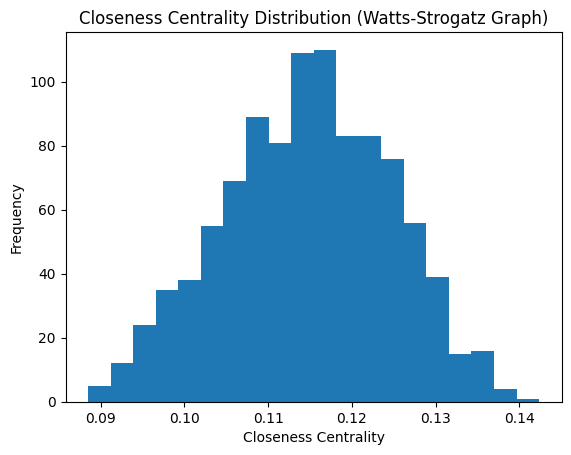

In [37]:

n = 1000
k = 4
p = 0.1
watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

closeness_centrality = nx.closeness_centrality(watts_strogatz_graph)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality Distribution (Watts-Strogatz Graph)')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()


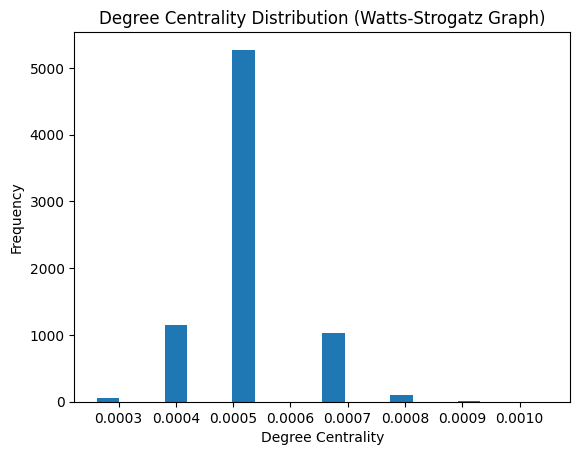

In [38]:
n = 7624
k = 4
p = 0.1

watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

degree_centrality = nx.degree_centrality(watts_strogatz_graph)

plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality Distribution (Watts-Strogatz Graph)')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


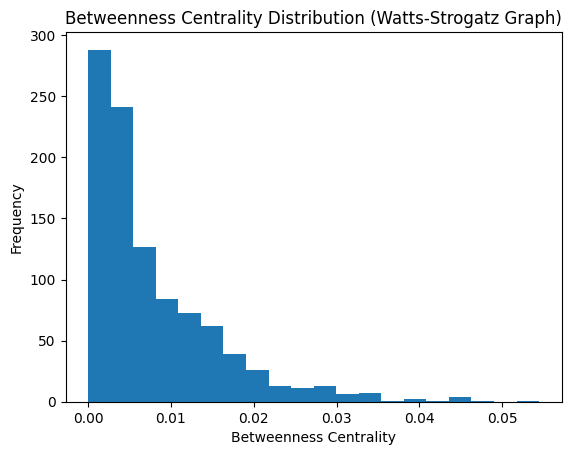

In [39]:
n = 1000
k = 4
p = 0.1

watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

betweenness_centrality = nx.betweenness_centrality(watts_strogatz_graph)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality Distribution (Watts-Strogatz Graph)')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


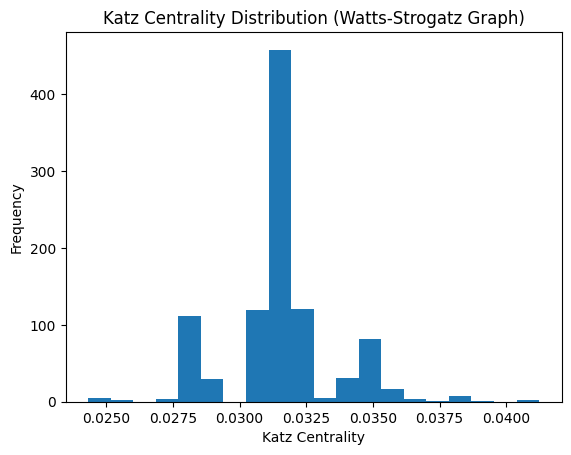

In [42]:
n = 1000
k = 4
p = 0.1
watts_strogatz_graph = nx.watts_strogatz_graph(n, k, p)

katz_centrality = nx.katz_centrality(watts_strogatz_graph)

plt.hist(list(katz_centrality.values()), bins=20)
plt.title('Katz Centrality Distribution (Watts-Strogatz Graph)')
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.show()



# Network analysis Barabasi-Albert graph:

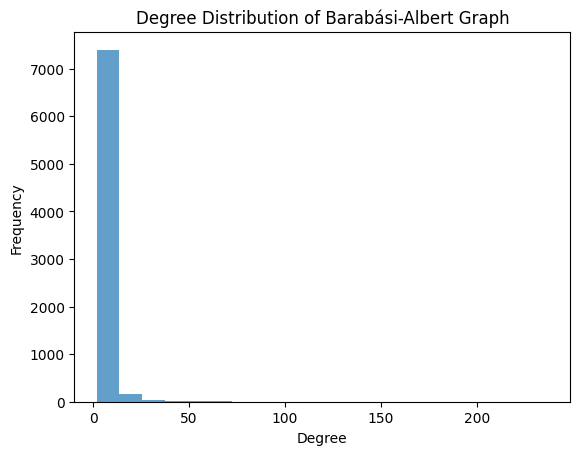

In [43]:
n = 7624
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

degree_sequence = sorted([d for n, d in barabasi_albert_graph.degree()], reverse=True)

plt.hist(degree_sequence, bins=20, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Barabási-Albert Graph')
plt.show()


Number of connected components: 1


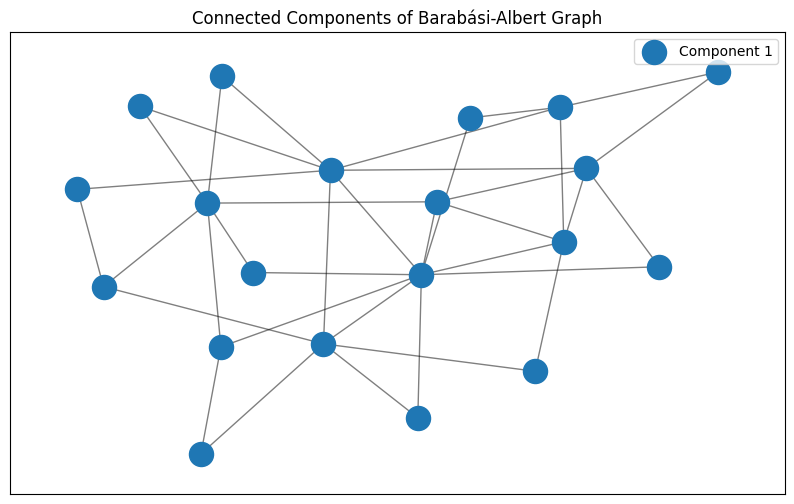

In [44]:
n = 20
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

connected_components = list(nx.connected_components(barabasi_albert_graph))

max_components = 5
connected_components = connected_components[:max_components]

print("Number of connected components:", len(connected_components))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(barabasi_albert_graph)
for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(barabasi_albert_graph, pos, nodelist=list(component), node_color=f'C{i}', label=f'Component {i+1}')
nx.draw_networkx_edges(barabasi_albert_graph, pos, alpha=0.5)
plt.title('Connected Components of Barabási-Albert Graph')
plt.legend()
plt.show()


In [45]:
n = 100
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

avg_shortest_path_length = nx.average_shortest_path_length(barabasi_albert_graph)

print("Average Shortest Path Length:", avg_shortest_path_length)


Average Shortest Path Length: 3.1193939393939396


Average Clustering Coefficient: 0.031083538361147994


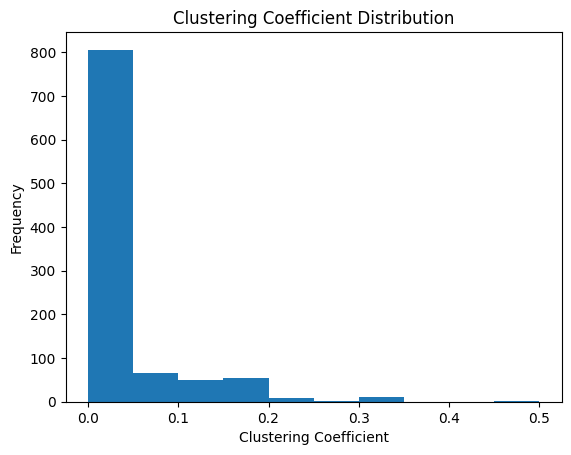

In [15]:
edge_list = pd.read_csv('lastfm_asia_edges.csv')

G = nx.from_pandas_edgelist(edge_list, 'node_1', 'node_2')

n = 1000
m = 4
barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

clustering_coefficients = nx.clustering(barabasi_albert_graph)

average_clustering = nx.average_clustering(barabasi_albert_graph)

print("Average Clustering Coefficient:", average_clustering)

plt.hist(list(clustering_coefficients.values()), bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()


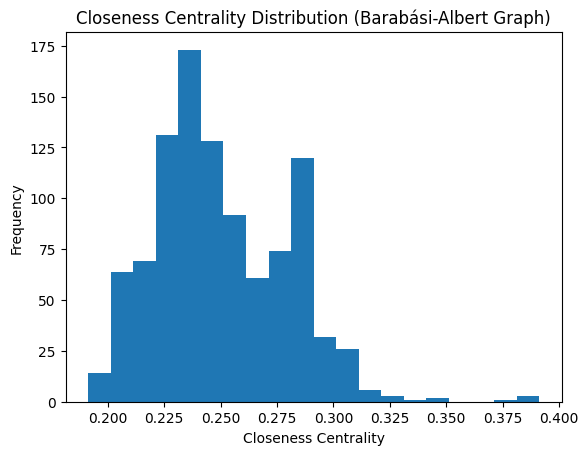

In [47]:
n = 1000
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

closeness_centrality = nx.closeness_centrality(barabasi_albert_graph)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality Distribution (Barabási-Albert Graph)')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()


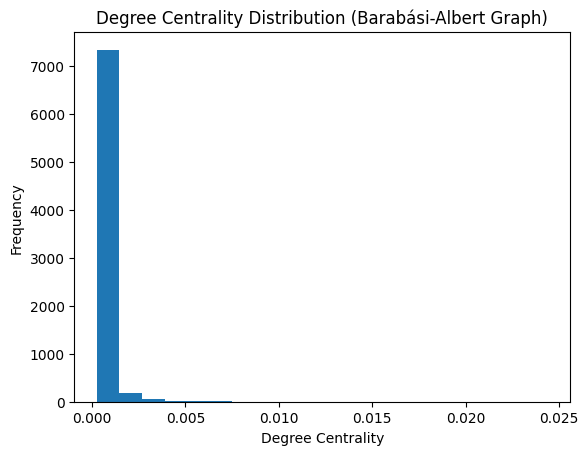

In [48]:
n = 7624
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

degree_centrality = nx.degree_centrality(barabasi_albert_graph)

plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality Distribution (Barabási-Albert Graph)')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


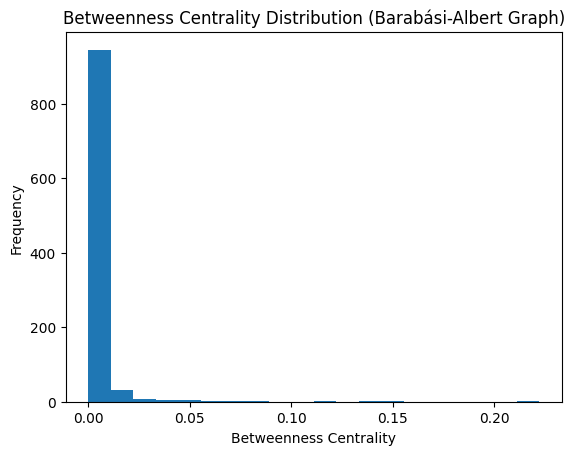

In [49]:

n = 1000
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

betweenness_centrality = nx.betweenness_centrality(barabasi_albert_graph)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality Distribution (Barabási-Albert Graph)')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


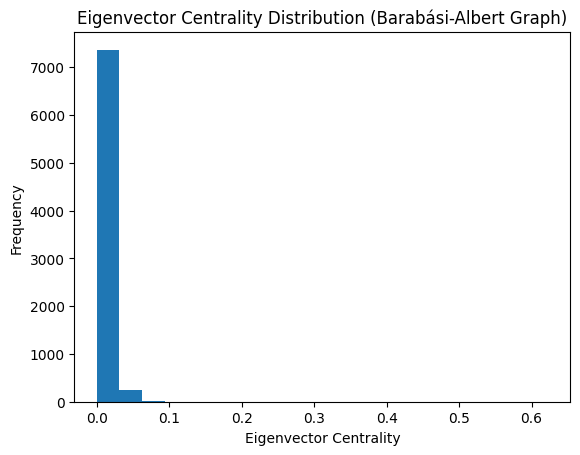

In [3]:
n = 7624
m = 2

barabasi_albert_graph = nx.barabasi_albert_graph(n, m)

eigenvector_centrality = nx.eigenvector_centrality(barabasi_albert_graph)

plt.hist(list(eigenvector_centrality.values()), bins=20)
plt.title('Eigenvector Centrality Distribution (Barabási-Albert Graph)')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()


Conclusion and anaylsis of graphs.

After analyzing the results of the graphs it is clear that when it comes to Degree Distribution real graph and 3 synthetics one has completely different graphs.  That means that the number of connections between each node is different. This means that connection and distribution of nods are unique. Next about connected components. We can see that real graphs are completely different from synthetic ones. Only Watts-strogatz and Barabasi-Albert graphs have similar structure of connected components. This indicate that graphs have different sets of isolated groups of nodes which are not connected. It means that every graph has a completely different structure and connectivity. Differences in clustering coefficient distributions between graphs can be caused by several factors, network model, presence of nodes or edge attributes and evolution dynamics. About centrality analysis, because for every kind of model the result was different it means that importance of nodes is way different for different kinds of models of the graph. Also we can see that in real graph in every kind of centrality graphs are very similar. To sum it all up, real graphs showed users of lastFm in Asia and relationships between them after conducting analysis and creating 3 synthetic graphs. I can say that the results were completely different.



data set: https://snap.stanford.edu/data/feather-lastfm-social.html

Reference

Hoffman, M. (n.d.). 12 Centrality | Methods for Network Analysis. [online] bookdown.org. Available at: https://bookdown.org/markhoff/social_network_analysis/centrality.html#eigenvector-centrality.

‌